In [ ]:
#urbansound8k dataset with ANN deep learning model

In [1]:
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os

In [2]:
os.chdir("E:\datasets")

In [3]:
!dir

 Volume in drive E is New Volume
 Volume Serial Number is C0C4-129B

 Directory of E:\datasets

15-04-2021  04:38 PM    <DIR>          .
15-04-2021  04:38 PM    <DIR>          ..
15-04-2021  02:42 PM               728 bmicalculator.py
15-02-2021  10:34 AM           613,392 country_vaccinations.csv
18-01-2021  04:20 PM         3,000,491 netflix_titles.csv
15-04-2021  11:05 PM    <DIR>          ultrasound
               3 File(s)      3,614,611 bytes
               3 Dir(s)  195,389,222,912 bytes free


In [4]:
filename = 'ultrasound/dog-bark.wav'

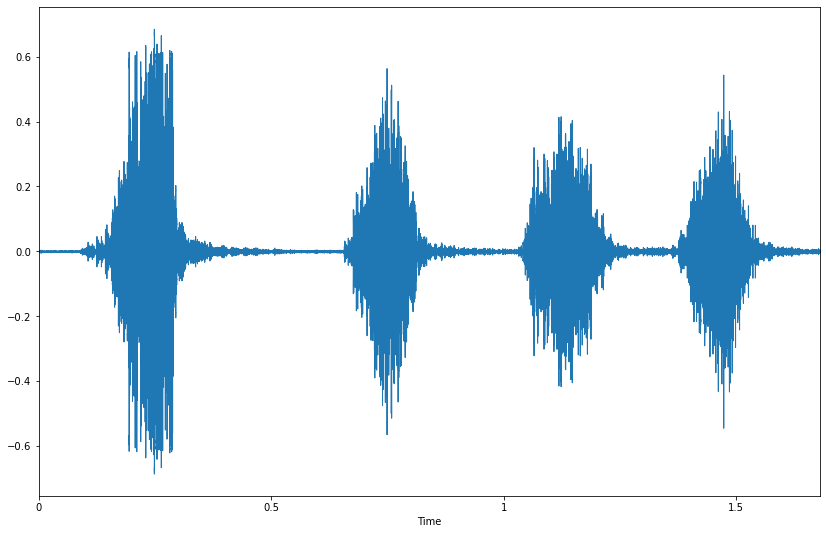

In [5]:
plt.figure(figsize=(14,9))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

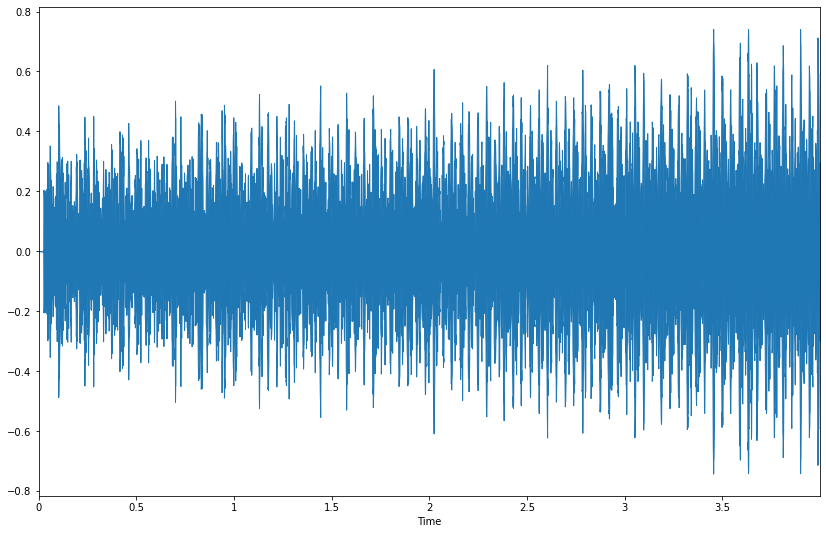

In [6]:
filename2= 'ultrasound/fold3/6988-5-0-0.wav'
plt.figure(figsize=(14,9))
data2,sample_rate2=librosa.load(filename2)
librosa.display.waveplot(data2,sr=sample_rate2)
ipd.Audio(filename2)

In [7]:
sample_rate2

22050

In [8]:
from scipy.io import wavfile as wav
wave_sample_rate,wav_audio=wav.read(filename2)

In [9]:
wave_sample_rate

44100

In [10]:
wav_audio #scipy

array([[    0,     0],
       [    0,     0],
       [    0,     0],
       ...,
       [11185,  8202],
       [11214,  8240],
       [11053,  8593]], dtype=int16)

In [11]:
data #librosa (normalized pattern)

array([ 2.2728866e-05, -4.2073693e-04, -9.0678880e-04, ...,
        9.9527719e-04,  1.2307205e-03,  1.1918487e-04], dtype=float32)

In [12]:
import pandas as pd

dataset = pd.read_csv('ultrasound/UrbanSound8K.csv')

In [13]:
dataset.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [15]:
dataset.describe()

,fsID,start,end,salience,fold,classID
count,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000
mean,116033.493816,38.645409,42.253312,1.347000,5.385937,4.592877
std,57991.017218,74.292126,74.369669,0.476043,2.846820,2.894544
min,344.000000,0.000000,0.105962,1.000000,1.000000,0.000000
25%,69942.250000,3.000000,6.839398,1.000000,3.000000,2.000000
50%,118279.000000,10.376492,14.000000,1.000000,5.000000,4.000000
75%,166942.000000,35.131372,38.866979,2.000000,8.000000,7.000000
max,209992.000000,600.125356,604.125356,2.000000,10.000000,9.000000


In [16]:
dataset['class'].value_counts()

air_conditioner     1000
dog_bark            1000
engine_idling       1000
street_music        1000
children_playing    1000
drilling            1000
jackhammer          1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [17]:
dataset.isna().sum()

slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
class              0
dtype: int64

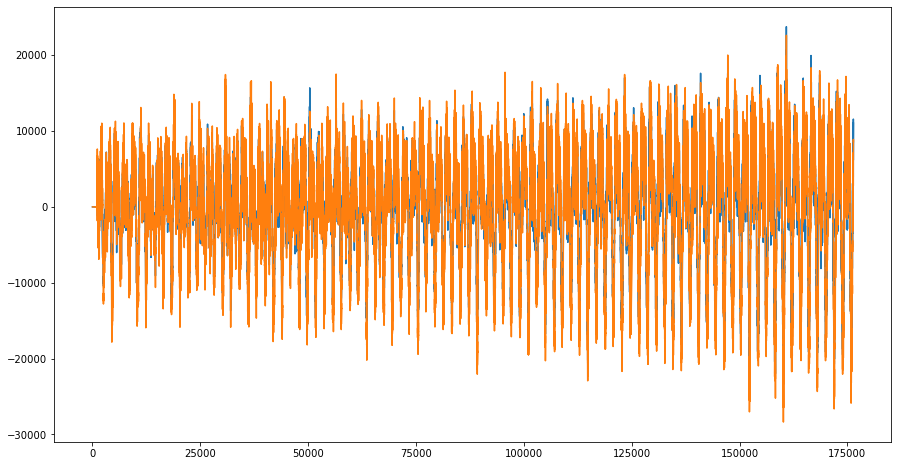

In [18]:
plt.figure(figsize=(15,8))
plt.plot(wav_audio)

#Exrtacting features

In [19]:
mfccs = librosa.feature.mfcc(y=data2, sr = sample_rate2, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [20]:
mfccs

array([[-2.32180771e+02, -1.52376236e+02, -1.44367447e+02, ...,
        -1.23986404e+02, -1.22797752e+02, -1.30593750e+02],
       [ 1.25244652e+02,  1.39496185e+02,  1.55777527e+02, ...,
         1.61089813e+02,  1.57231232e+02,  1.43428360e+02],
       [ 4.02763695e-01, -6.67262077e+00, -1.54922886e+01, ...,
        -2.63325157e+01, -3.04893951e+01, -3.02629395e+01],
       ...,
       [ 5.28329372e+00,  3.92733216e+00,  3.36533546e+00, ...,
         6.90499783e+00,  8.02376270e+00,  9.02729225e+00],
       [-4.73399067e+00, -2.30462718e+00,  1.28918350e-01, ...,
         6.66649246e+00,  2.89770198e+00,  2.79958224e+00],
       [-3.43294096e+00,  6.07083797e-01,  5.01259327e+00, ...,
         7.48097706e+00,  6.16084814e+00,  6.64401054e+00]], dtype=float32)

In [21]:
import pandas as pd
import os
import librosa

In [22]:
audio_dataset = 'ultrasound/'
dataset.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [23]:
def feature_extractor(file):
    audio, sample_rate=librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features =librosa.feature.mfcc(y=audio, sr= sample_rate,n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [24]:
import numpy as np
from tqdm import tqdm
extracted_features=[]
for index_num,row in tqdm(dataset.iterrows()):
    file_name=os.path.join(os.path.abspath(audio_dataset),'fold'+ str(row['fold'])+'/',str(row["slice_file_name"]))
    final_class=row['class']
    data=feature_extractor(file_name)
    extracted_features.append([data,final_class])

3554it [04:07, 13.69it/s]C:\Users\parth\anaconda3\envs\tf\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8326it [10:01, 20.46it/s]C:\Users\parth\anaconda3\envs\tf\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
C:\Users\parth\anaconda3\envs\tf\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [10:29, 13.86it/s]


In [55]:
extracted_features= pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01073, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [56]:
X = np.array(extracted_features['feature'].tolist())
y = np.array(extracted_features['class'].tolist())

In [57]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [58]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))

In [59]:
y.shape

(8732, 10)

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [61]:
X_train.shape 

(6985, 40)

In [62]:
X_test.shape

(1747, 40)

In [63]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [65]:
num_labels=y.shape[1]

In [66]:
model = Sequential()
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_5 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)              

In [68]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [78]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs= 100
num_batch_size= 32
checkpointer = ModelCheckpoint(filepath='datasets/ultrasound.hdf5',verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train,y_train,batch_size=num_batch_size,epochs=num_epochs, validation_data=(X_test,y_test),callbacks=[checkpointer])


duration= datetime.now() -start
print("training completed in time: ",duration)

Epoch 1/100
204/219 [==========================>...] - ETA: 0s - loss: 0.8559 - accuracy: 0.7212
Epoch 00001: val_loss improved from inf to 0.66334, saving model to datasets\ultrasound.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 0.8518 - accuracy: 0.7200 - val_loss: 0.6633 - val_accuracy: 0.7997
Epoch 2/100
197/219 [=========================>....] - ETA: 0s - loss: 0.8359 - accuracy: 0.7251
Epoch 00002: val_loss improved from 0.66334 to 0.65303, saving model to datasets\ultrasound.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 0.8317 - accuracy: 0.7270 - val_loss: 0.6530 - val_accuracy: 0.8008
Epoch 3/100
197/219 [=========================>....] - ETA: 0s - loss: 0.8294 - accuracy: 0.7299
Epoch 00003: val_loss did not improve from 0.65303
219/219 [==============================] - 0s 2ms/step - loss: 0.8216 - accuracy: 0.7329 - val_loss: 0.6629 - val_accuracy: 0.7997
Epoch 4/100
195/219 [=========================>....] - ETA: 0s - loss: 0.81

In [79]:
test_accuracy = model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8088151216506958


In [88]:
filename1='ultrasound/gunshot.wav'
audio,sample_rate = librosa.load(filename1,res_type='kaiser_fast')
mfccs_features=librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features= np.mean(mfccs_features.T,axis=0)
print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)#one row with 40 features
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

predictlabels = model.predict_classes(mfccs_scaled_features)
print(predictlabels)
predictclass = labelencoder.inverse_transform(predictlabels)
predictclass





[-3.6748575e+02  5.7891193e+01  2.0829403e+00  1.4214236e+00
 -7.7970529e+00  8.6992246e-01 -9.4780797e-01  6.9010720e+00
  3.3797605e+00  7.5977011e+00  1.3326136e+00  4.0147324e+00
 -5.8701146e-01  2.9345522e+00  4.5471597e-02  1.6469111e+00
 -1.5028931e+00  3.5974479e-01 -1.0197173e+00  5.2282661e-01
 -5.2447426e-01  9.5125312e-01 -2.8191277e-01  5.4223293e-01
 -3.6854261e-01  4.9264723e-01 -3.2919604e-01  9.0869945e-01
  7.1594888e-01  1.1808811e+00  1.2402858e-01  2.3238276e-01
  2.8973195e-01  8.4908205e-01  1.3901992e-01  2.3804475e-01
 -8.3668780e-01 -7.8108305e-01 -3.8656655e-01  5.0782967e-02]
[[-3.6748575e+02  5.7891193e+01  2.0829403e+00  1.4214236e+00
  -7.7970529e+00  8.6992246e-01 -9.4780797e-01  6.9010720e+00
   3.3797605e+00  7.5977011e+00  1.3326136e+00  4.0147324e+00
  -5.8701146e-01  2.9345522e+00  4.5471597e-02  1.6469111e+00
  -1.5028931e+00  3.5974479e-01 -1.0197173e+00  5.2282661e-01
  -5.2447426e-01  9.5125312e-01 -2.8191277e-01  5.4223293e-01
  -3.6854261e-01 

array(['gun_shot'], dtype='<U16')

In [50]:
dataset['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)